# Simulation of an SIR(D) stochastic process in continuous time

## Continuous Time Markov Chain

A continuous-time Markov chain (CTMC) is a memoryless stochastic process on a countable state space $E$.  
If $X_t \in E$, then from any state $i \in E$:

- The **holding time** in $i$ is exponential with rate $\lambda_i = -Q_{ii}$.
- The **jump destination** is $j \neq i$ with probability $\displaystyle \frac{Q_{ij}}{\lambda_i}$.

For small $\Delta t > 0$:

$$
\mathbb{P}(X_{t+\Delta t}=j \mid X_t=i)=
\begin{cases}
Q_{ij}\,\Delta t + o(\Delta t), & j \neq i,\\[4pt]
1 + Q_{ii}\,\Delta t + o(\Delta t), & j = i.
\end{cases}
$$

---

### Generator $Q$

For $i \neq j$:

$$
Q_{ij} = \text{rate of transition } i \to j,
$$

and the diagonal entries are:

$$
Q_{ii} = -\sum_{k \neq i} Q_{ik}.
$$

---

### Definition of the generator \( Q \) for our problem:

For the continuous-time Markov process $(S, I, R)$ with total population $N$,  
each infected individual:

- infects a susceptible at **rate** $\dfrac{\beta}{N}$ per contact,  
- **recovers** at rate $\gamma$,  
- **dies** at rate $\nu$.

Then, the transition rates of the Markov chain $(S, I, R)$ from state $(s, i, r) \in E$  
to another state $(s + k, i + j, r + l) \in E$ are:

$$
Q_{(s,i,r),(s+k,i+j,r+l)} =
\begin{cases}
\dfrac{\beta s i}{N}, & \text{if } (k, j, l) = (-1, 1, 0), \\[6pt]
\gamma i, & \text{if } (k, j, l) = (0, -1, 1), \\[6pt]
\nu i, & \text{if } (k, j, l) = (0, -1, 0), \\[6pt]
0, & \text{otherwise.}
\end{cases}
$$

and the diagonal entries satisfy:

$$
Q_{(s,i,r),(s,i,r)} = -\!\!\sum_{(k,j,l)\neq(0,0,0)} Q_{(s,i,r),(s+k,i+j,r+l)}.
$$

---

**Interpretation:**

- Infection: one susceptible becomes infected  
  $(s,i,r) \;\to\; (s-1,\, i+1,\, r)$  
- Recovery: one infected recovers  
  $(s,i,r) \;\to\; (s,\, i-1,\, r+1)$  
- Death: one infected dies  
  $(s,i,r) \;\to\; (s,\, i-1,\, r)$  

The diagonal term ensures that each row of $Q$ sums to zero.

**Absorbing states:**  
A state is **absorbing** if and only if $I = 0$.  
Once the number of infected individuals reaches zero, no further transitions are possible,  
so $(s, 0, r)$ is absorbing for all $s, r \in \{0, 1, \dots, N\}$.

---

## State space size for the SIR(D) model when $N = 3$

We model $(S, I, R)$ with total population $N$ and allow deaths $D$ implicitly via

$$
S + I + R \le N \quad \Longleftrightarrow \quad
S + I + R + D = N, \; D \ge 0.
$$

Counting **triples** $(S, I, R)$ with $S, I, R \ge 0$ and $S + I + R \le N$  
is equivalent to counting **quadruples** $(S, I, R, D)$ with $S + I + R + D = N$.

By **stars and bars**, the number of nonnegative integer solutions to

$$
S + I + R + D = N
$$

is

$$
\binom{N + 4 - 1}{4 - 1} = \binom{N + 3}{3}.
$$

For $N = 3$:

$$
\#\{(S, I, R): S + I + R \le 3\} = \binom{6}{3} = 20.
$$

*(Here the “number of counted variables” is 4 because we introduce the slack variable $D = N - (S + I + R)$. )*

---

## Number of absorbing states (all infectious removed)

A state is **absorbing** iff $I = 0$.  
We must count pairs $(S, R)$ with $S, R \ge 0$ and $S + R \le N$.  
Introduce the slack $D \ge 0$ so that $S + R + D = N$.

By stars and bars (now 3 variables):

$$
\#\{(S, R): S + R \le N\} = \binom{N + 3 - 1}{3 - 1} = \binom{N + 2}{2}.
$$

For $N = 3$:

$$
\#\{\text{absorbing states}\} = \binom{5}{2} = 10.
$$

---

## The generator matrix Q (for N = 3) is shown as below:

$$
Q =
\begin{array}{c|cccccccccccccccccccc}
 & (0,0,0) & (0,0,1) & (0,0,2) & (0,0,3) & (0,1,0) & (0,1,1) & (0,1,2) & (0,2,0) & (0,2,1) & (0,3,0) & (1,0,0) & (1,0,1) & (1,0,2) & (1,1,0) & (1,1,1) & (1,2,0) & (2,0,0) & (2,0,1) & (2,1,0) & (3,0,0) \\
\hline
(0,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,2) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,3) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,0) & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & 0 & 0 & \textcolor{orange}{-(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,1) & 0 & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & 0 & 0 & \textcolor{orange}{-(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,2) & 0 & 0 & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & 0 & 0 & \textcolor{orange}{-(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,2,0) & 0 & 0 & 0 & 0 & \textcolor{orange}{2\nu} & \textcolor{orange}{2\gamma} & 0 & \textcolor{orange}{-2(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,2,1) & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{2\nu} & \textcolor{orange}{2\gamma} & 0 & \textcolor{orange}{-2(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,3,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{3\nu} & \textcolor{orange}{3\gamma} & \textcolor{orange}{-3(\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,2) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,1,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{\beta}{3}} & 0 & 0 & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & 0 & \textcolor{orange}{-(\tfrac{\beta}{3}+\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,1,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{\beta}{3}} & 0 & 0 & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & 0 & \textcolor{orange}{-(\tfrac{\beta}{3}+\nu+\gamma)} & 0 & 0 & 0 & 0 & 0 \\
(1,2,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{2\beta}{3}} & 0 & 0 & 0 & \textcolor{orange}{2\nu} & \textcolor{orange}{2\gamma} & \textcolor{orange}{-2(\tfrac{\beta}{3}+\nu+\gamma)} & 0 & 0 & 0 & 0 \\
(2,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(2,0,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(2,1,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{2\beta}{3}} & \textcolor{orange}{\nu} & \textcolor{orange}{\gamma} & \textcolor{orange}{-(\tfrac{2\beta}{3}+\nu+\gamma)} & 0 \\
(3,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}
$$

### 1. Complete transition probability matrix for this Markov chain for N = 3 for an infinitesimal time-step ∆t > 0.

### 1. Derivation of \(P(t)\) and computation of (∆t) for \(N = 3\)

To build the **transition probability matrix** \(P(t)\) for our continuous-time Markov chain (CTMC),  
we start from the definition of the **transition probabilities**:

$$
P(t) = (p_{ij}(t))_{i,j} 
\quad \text{with} \quad 
p_{ij}(t) = \mathbb{P}(X_t = j \mid X_0 = i).
$$

---

#### Step 1 — Using the Chapman–Kolmogorov equation

For a time-homogeneous CTMC, the transition probabilities satisfy the **Chapman–Kolmogorov equation**:

$$
P(t+h) = P(t)\,P(h), \qquad t,h \ge 0.
$$

This expresses the fact that moving from time \(0\) to \(t+h\) can be decomposed into two successive transitions:
from \(0 to t\) and from \(t to t+h\).

---

#### Step 2 — Derivative of \(P(t)\)

To find the evolution of \(P(t)\) with time, we take the derivative:

$$
P'(t) = \lim_{h \downarrow 0} \frac{P(t+h) - P(t)}{h}.
$$

Using Chapman–Kolmogorov, \(P(t+h) = P(t)P(h)\), we get:

$$
P'(t) = P(t)\,\lim_{h \downarrow 0} \frac{P(h) - I}{h}.
$$

The term inside the limit defines the **generator matrix** \(Q\):

$$
Q = \lim_{h \downarrow 0} \frac{P(h) - I}{h}.
$$

Hence the differential equation:

$$
\boxed{\frac{d}{dt}P(t) = P(t)Q, \qquad P(0) = I.}
$$

This is the **Kolmogorov forward equation**.

---

#### Step 3 — Solving the differential equation

The unique solution to this matrix differential equation is given by the **matrix exponential**:

$$
\boxed{P(t) = e^{tQ}}
$$

with the series expansion:

$$
e^{tQ} = \sum_{n=0}^{\infty} \frac{(tQ)^n}{n!}.
$$

---

#### Step 4 — Simplifying for infinitesimal time step $\Delta t$

For an **infinitesimal** time interval $\Delta t > 0$,  
we use only the **first-order approximation** of the exponential series:

$$
P(\Delta t) \approx I + \Delta t\,Q.
$$

This approximation is consistent with the CTMC’s small-time transition probabilities:

$$
p_{ij}(\Delta t) \approx
\begin{cases}
Q_{ij}\,\Delta t, & i \neq j, \\[4pt]
1 + Q_{ii}\,\Delta t, & i = j.
\end{cases}
$$

---

#### Step 5 — Applying it to the SIRD model for $N = 3$

For our epidemic model with $N = 3$, we first defined the generator matrix $Q$ as:

$$
Q_{(s,i,r),(s+k,i+j,r+l)} =
\begin{cases}
\dfrac{\beta s i}{N}, & (k,j,l) = (-1,1,0), \\[4pt]
\gamma i, & (k,j,l) = (0,-1,1), \\[4pt]
\nu i, & (k,j,l) = (0,-1,0), \\[4pt]
0, & \text{otherwise.}
\end{cases}
$$

and

$$
Q_{(s,i,r),(s,i,r)} =
- \!\!\sum_{(k,j,l)\neq(0,0,0)}
Q_{(s,i,r),(s+k,i+j,r+l)}.
$$

Given this $Q$ matrix (of size $20 \times 20$ for $N = 3$),  
the **infinitesimal transition probability matrix** is obtained as:

$$
\boxed{P(\Delta t) \approx I + \Delta t\,Q.}
$$

This matrix describes the probabilities of moving between all 20 states of the Markov chain during an infinitesimal time interval $\Delta t$.

$$
P(\Delta t) =
\begin{array}{c|cccccccccccccccccccc}
 & (0,0,0) & (0,0,1) & (0,0,2) & (0,0,3) & (0,1,0) & (0,1,1) & (0,1,2) & (0,2,0) & (0,2,1) & (0,3,0) & (1,0,0) & (1,0,1) & (1,0,2) & (1,1,0) & (1,1,1) & (1,2,0) & (2,0,0) & (2,0,1) & (2,1,0) & (3,0,0) \\
\hline
(0,0,0) & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,1) & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,2) & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,0,3) & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,0) & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & 0 & 0 & \textcolor{orange}{1-(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,1) & 0 & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & 0 & 0 & \textcolor{orange}{1-(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,1,2) & 0 & 0 & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & 0 & 0 & \textcolor{orange}{1-(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,2,0) & 0 & 0 & 0 & 0 & \textcolor{orange}{2\nu\Delta t} & \textcolor{orange}{2\gamma\Delta t} & 0 & \textcolor{orange}{1-2(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,2,1) & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{2\nu\Delta t} & \textcolor{orange}{2\gamma\Delta t} & 0 & \textcolor{orange}{1-2(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(0,3,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{3\nu\Delta t} & \textcolor{orange}{3\gamma\Delta t} & \textcolor{orange}{1-3(\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,0,2) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,1,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{\beta}{3}\Delta t} & 0 & 0 & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & 0 & \textcolor{orange}{1-(\tfrac{\beta}{3}+\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 & 0 \\
(1,1,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{\beta}{3}\Delta t} & 0 & 0 & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & 0 & \textcolor{orange}{1-(\tfrac{\beta}{3}+\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 & 0 \\
(1,2,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{2\beta}{3}\Delta t} & 0 & 0 & 0 & \textcolor{orange}{2\nu\Delta t} & \textcolor{orange}{2\gamma\Delta t} & \textcolor{orange}{1-2(\tfrac{\beta}{3}+\nu+\gamma)\Delta t} & 0 & 0 & 0 & 0 \\
(2,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 & 0 \\
(2,0,1) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} & 0 & 0 \\
(2,1,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{\tfrac{2\beta}{3}\Delta t} & \textcolor{orange}{\nu\Delta t} & \textcolor{orange}{\gamma\Delta t} & \textcolor{orange}{1-(\tfrac{2\beta}{3}+\nu+\gamma)\Delta t} & 0 \\
(3,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \textcolor{orange}{1} \\
\end{array}
$$


# 2. Simulation of 100 trajectories using Gillespie's algorithm.

To generate random trajectories of the epidemic process over time, we simulate each event 
$(S, I, R, D)$ **one by one**, with *random waiting times* between events.

---

### **1. Each event is a Poisson process**

Each possible transition (infection, recovery, or death) happens randomly in continuous time and 
can be modeled as a **Poisson process** — meaning that events occur independently with a constant average rate.

We define the **propensities** (rates) for each event as:

$$
a_1 = \frac{\beta S I}{N}, \quad a_2 = \gamma I, \quad a_3 = \nu I
$$

These represent the instantaneous probabilities per unit time of infection, recovery, and death respectively.

The **total event rate** is then:

$$
a_0 = a_1 + a_2 + a_3
$$

This total rate corresponds to the combined Poisson process describing the time until *any* event occurs.

---

### **2. Waiting time between events**

In a Poisson process, the time between two consecutive events follows an **exponential distribution**.  
The probability that *no event happens* before time $\tau$ is:

$$
P(\text{no event before } \tau) = e^{-a_0 \tau}
$$

If we draw a random number $r_1 \sim \text{Uniform}(0,1)$, we can solve for $\tau$:

$$
r_1 = e^{-a_0 \tau} \quad \Rightarrow \quad \tau = -\frac{1}{a_0} \ln(r_1)
$$

or equivalently:

$$
\tau = \frac{1}{a_0} \ln\!\left(\frac{1}{r_1}\right)
$$

**Interpretation:**
- If $a_0$ is **large**, events happen very frequently → $\tau$ is small.  
- If $a_0$ is **small**, events are rare → $\tau$ is large.

---

### **3. Choosing which event occurs**

After determining the waiting time $\tau$, we must decide **which** of the three possible events happens next.

Each event is chosen with a probability proportional to its rate:

$$
P(\text{infection}) = \frac{a_1}{a_0}, \quad 
P(\text{recovery}) = \frac{a_2}{a_0}, \quad 
P(\text{death}) = \frac{a_3}{a_0}
$$

We generate another random number $r_2 \sim \text{Uniform}(0,1)$:

- If $r_2 < \frac{a_1}{a_0}$ → an **infection** occurs  
- Else if $r_2 < \frac{a_1 + a_2}{a_0}$ → a **recovery** occurs  
- Else → a **death** occurs

The state $(S, I, R, D)$ is then updated accordingly.

---

### **4. Repeat until absorption**

The process is repeated:
1. Recompute all propensities $a_1, a_2, a_3$
2. Generate new $r_1, r_2$
3. Calculate new $\tau$
4. Update time and state

The simulation stops when $I = 0$, meaning the epidemic has ended.  
This is called the **absorption state**.

---

### **5. The stochastic trajectory**

By storing all values of $(t, S, I, R, D)$ over time, we obtain one **stochastic trajectory** of the epidemic.  
Repeating the algorithm multiple times produces different random realizations of the process, 
allowing us to estimate averages, variances, and distributions of epidemic outcomes.

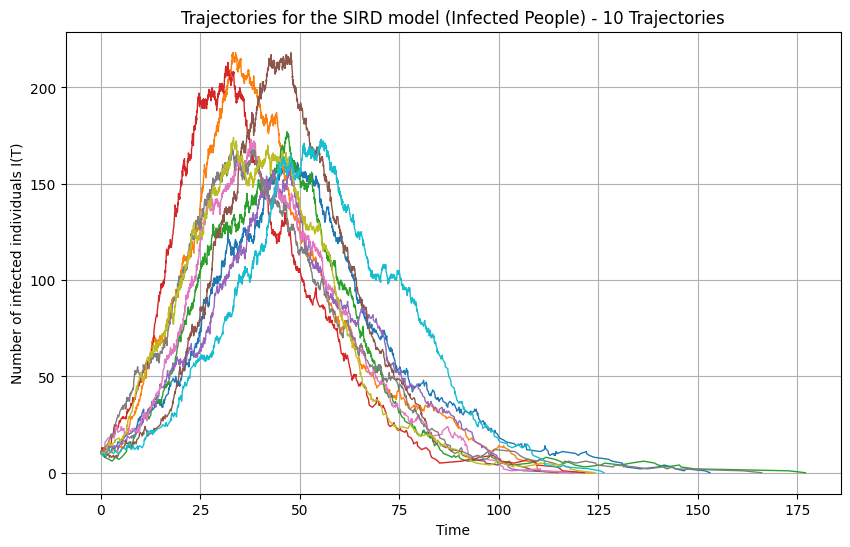

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 1000
S0, I0, R0, D0 = 990, 10, 0, 0
beta = 0.2
gamma = 0.1
nu = 0.001
n_sim = 100

def gillespie_sird(S0, I0, R0, D0, N, beta, gamma, nu):
    t = 0.0
    S, I, R, D = S0, I0, R0, D0
    times = [t]
    states = [(S,I,R,D)]

    while I > 0:
        a1 = beta * S * I / N
        a2 = gamma * I
        a3 = nu * I
        a0 = a1 + a2 + a3

        if a0 == 0:
            break

        r1, r2 = np.random.random(2)
        tau = (1/a0) * np.log(1/r1)
        t += tau

        if (r2 < a1/a0):
            S -= 1
            I += 1
        elif (r2 < (a1 + a2)/a0):
            I -= 1
            R += 1
        else:
            I -= 1
            D += 1

        times.append(t)
        states.append((S,I,R,D))

    return np.array(times), np.array(states)

trajectories = []
for sim in range(n_sim):
    t, states = gillespie_sird(S0, I0, R0, D0, N, beta, gamma, nu)
    trajectories.append((t, states))

plt.figure(figsize = (10, 6))
for k in range(10):
    t, states = trajectories[k]
    S, I, R, D = states.T
    plt.plot(t, I, lw = 1)
plt.xlabel("Time")
plt.ylabel("Number of infected individuals I(T)")
plt.title("Trajectories for the SIRD model (Infected People) - 10 Trajectories")
plt.grid()
plt.show()

In [2]:
#Saving the trajectories in a Data Frame
data_list = []
for idx, (t, states) in enumerate(trajectories):
    for tt, (S, I, R, D) in zip(t, states):
        data_list.append([idx, tt, S, I, R, D])

df = pd.DataFrame(data_list, columns=["simulation", "time", "S", "I", "R", "D"])
df.to_csv("sird_trajectories.csv", index=False)

print("Simulation complete! Data saved as sird_trajectories.csv")

Simulation complete! Data saved as sird_trajectories.csv


---
# 3. Mean and Variance of the epidemic duration

The **epidemic duration** for one simulation is the time when the infection disappears:

$$
T_{\text{ext}} = \inf \{ t \ge 0 : I(t) = 0 \}
$$

In practice, this is the **final time** of the simulation (since the loop stops when $I = 0$).

Over all simulations, we compute:

- **Empirical mean:**
  $$
  \hat{T}_{\text{ext}} = \frac{1}{N_{\text{sim}}} \sum_{i=1}^{N_{\text{sim}}} T_{\text{ext}}^{(i)}
  $$
- **Empirical variance:**
  $$
  \text{Var}(T_{\text{ext}}) = \frac{1}{N_{\text{sim}} - 1} \sum_{i=1}^{N_{\text{sim}}} (T_{\text{ext}}^{(i)} - \hat{T}_{\text{ext}})^2
  $$

Here, each $T_{\text{ext}}^{(i)}$ is the epidemic duration from one Gillespie trajectory.

In [3]:
durations = []
for t, states in trajectories:
    durations.append(t[-1])

T_mean = np.mean(durations)
T_var = np.var(durations, ddof=1)

print(f"Empirical mean (T̂_ext): {T_mean:.3f}")
print(f"Empirical variance: {T_var:.3f}")

Empirical mean (T̂_ext): 147.582
Empirical variance: 528.274


---
# 4.Distribution of $I(\hat{T}_{\text{ext}} / 2)$

We compute the mean epidemic duration $\hat{T}_{\text{ext}}$ from all simulations,  then for each trajectory evaluate the number of infected individuals at time $\hat{T}_{\text{ext}} / 2$.  

The collected values $I(\hat{T}_{\text{ext}} / 2)$ form a sample from which we plot the **empirical distribution** (histogram) to visualize variability across simulations.

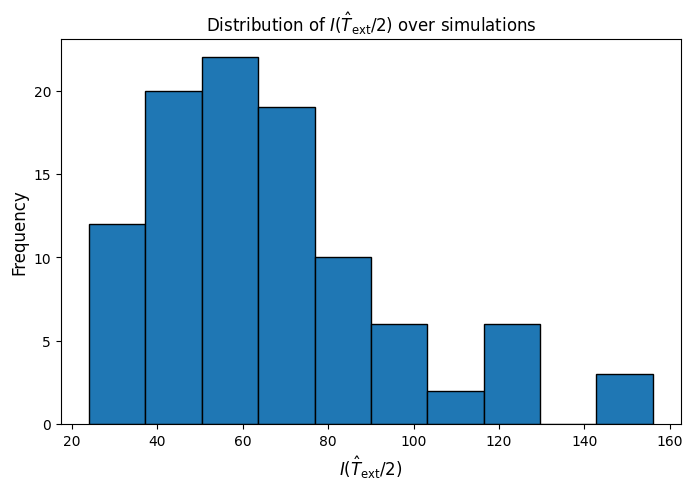

In [4]:
half_time = T_mean / 2
I_half = []

for t, states in trajectories:
    I = states[:, 1]                         
    idx = np.searchsorted(t, half_time, side="right") - 1
    idx = max(idx, 0)
    I_half.append(I[idx])

plt.figure(figsize = (8,5))
plt.hist(I_half, bins='auto',edgecolor = 'black')
plt.xlabel(r"$I(\hat{T}_{\text{ext}} / 2)$", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(r"Distribution of $I(\hat{T}_{\text{ext}} / 2)$ over simulations")
plt.show()

---
# 5. Final Size of the Epidemic

For each simulation, the **final size** is the total number of individuals who were infected at any point during the epidemic. Since recovered and dead individuals came from the infected class, this is equal to:

$$
\text{Final size} = N - S(T_{\text{ext}})
$$

where $S(T_{\text{ext}})$ is the number of susceptible individuals at the end of the epidemic (when $I = 0$).

We proceed as follows:

1. For each trajectory, record the final value of $S$ at extinction time $T_{\text{ext}}$.
2. Compute $N - S(T_{\text{ext}})$ to obtain the final epidemic size for that simulation.
3. Compute the **empirical mean** and **empirical variance** over all simulations:

$$
\overline{F} = \frac{1}{N_{\text{sim}}} \sum_{i=1}^{N_{\text{sim}}} (N - S(T_{\text{ext}}^{(i)})),
$$

$$
\text{Var}(F) = \frac{1}{N_{\text{sim}} - 1} \sum_{i=1}^{N_{\text{sim}}} \left[(N - S(T_{\text{ext}}^{(i)})) - \overline{F}\right]^2.
$$

In [5]:
final_sizes = []

for t, states in trajectories:
    S_end = states[-1, 0]
    final_size = N - S_end
    final_sizes.append(final_size)

final_mean = np.mean(final_sizes)
final_var = np.var(final_sizes, ddof=1)

print("Empirical mean of final epidemic size:", final_mean)
print("Empirical variance:", final_var)

Empirical mean of final epidemic size: 791.48
Empirical variance: 624.5349494949496


---
# 6. Plotting 10 trajectories of (S,I,R,D)

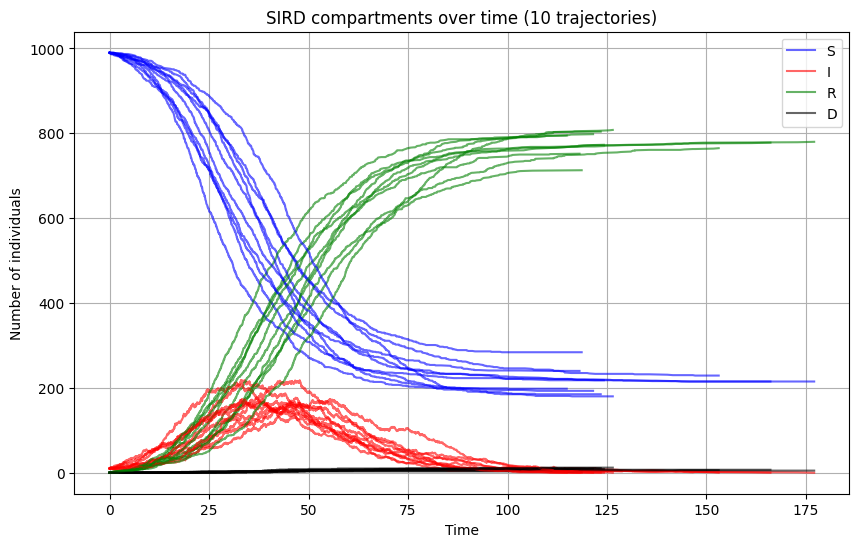

In [6]:
plt.figure(figsize=(10,6))
for k in range(10):
    t, states = trajectories[k]
    S, I, R, D = states.T
    plt.plot(t, S, label="S", color="blue", alpha=0.6)
    plt.plot(t, I, label="I", color="red", alpha=0.6)
    plt.plot(t, R, label="R", color="green", alpha=0.6)
    plt.plot(t, D, label="D", color="black", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Number of individuals")
plt.title("SIRD compartments over time (10 trajectories)")
plt.legend(["S", "I", "R", "D"])
plt.grid()
plt.show()

# 7. Estimation of reproduction number from Simulated Data

To estimate the basic reproduction number \( R_0 \), we use the early phase of the epidemic where the number of infected individuals grows approximately exponentially:

$$
I(t) \approx I_0 e^{rt}
$$

Taking the logarithm gives a linear relationship:

$$
\ln I(t) = rt + \ln I_0
$$

We extract early values of \( I(t) \), perform a linear regression on \( \ln I(t) \), and obtain the growth rate \( r \).  
The mean infectious duration is:

$$
\frac{1}{\gamma + \nu}
$$

The reproduction number is then estimated by:

$$
R_0 = 1 + r \cdot \frac{1}{\gamma + \nu}
$$

This matches the theoretical expression:

$$
R_0 = \frac{\beta}{\gamma + \nu}
$$

Estimated R0: 1.9141868188539959


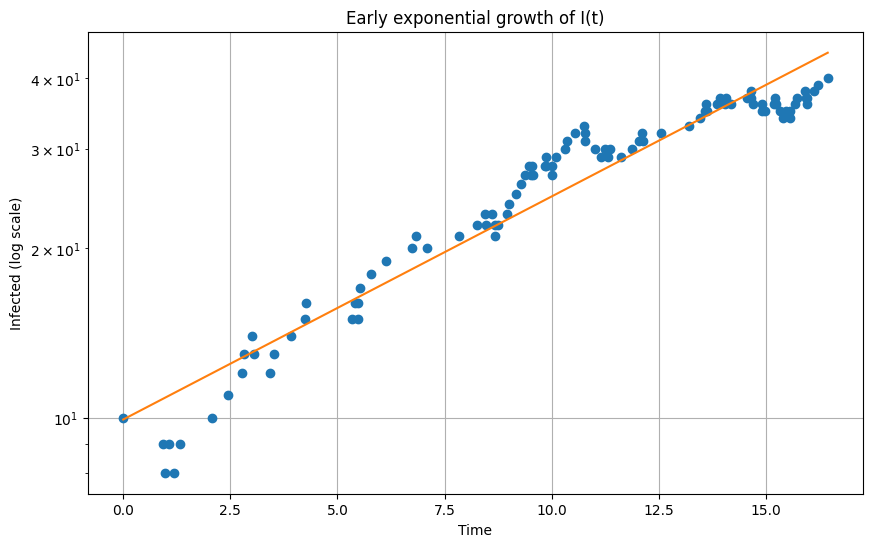

In [7]:
# Step 1: estimate exponential growth rate r
r_values = []

for t, states in trajectories:
    I = states[:, 1]
    mask = I > 0
    t_e = t[mask]
    I_e = I[mask]
    if len(I_e) < 5:
        continue
    threshold = 40
    cut_idx = np.argmax(I_e > threshold) if np.any(I_e > threshold) else len(I_e)
    t_e = t_e[:cut_idx]
    I_e = I_e[:cut_idx]
    if len(I_e) < 5:
        continue
    logI = np.log(I_e)
    r, a = np.polyfit(t_e, logI, 1)
    r_values.append(r)

r_mean = np.mean(r_values)

# Step 2: mean infectious duration
mean_infectious = 1 / (gamma + nu)

# Step 3: estimate R0
R0_est = 1 + r_mean * mean_infectious
print("Estimated R0:", R0_est)

# Plot showing exponential growth (one trajectory)
t, states = trajectories[0]
I = states[:, 1]
mask = I > 0
t_e = t[mask]
I_e = I[mask]
threshold = 40
cut_idx = np.argmax(I_e > threshold) if np.any(I_e > threshold) else len(I_e)
t_e = t_e[:cut_idx]
I_e = I_e[:cut_idx]
logI = np.log(I_e)
r, a = np.polyfit(t_e, logI, 1)
t_fit = np.linspace(t_e.min(), t_e.max(), 200)
I_fit = np.exp(a + r * t_fit)

plt.figure(figsize=(10,6))
plt.plot(t_e, I_e, 'o')
plt.plot(t_fit, I_fit, '-')
plt.yscale('log')
plt.xlabel("Time")
plt.ylabel("Infected (log scale)")
plt.title("Early exponential growth of I(t)")
plt.grid(True)
plt.show()


---
# 8. SEIRD: Adding a latent (non-infectious) class


### 1) Compartments

We track the population counts

$$S(t),\; E(t),\; I(t),\; R(t).$$

Total population $N$ is constant. Deaths are implicit:

$$D(t) = N - S(t) - E(t) - I(t) - R(t).$$


### 2) Parameters

- $\beta$: transmission rate (scaled by $1/N$)
- $\sigma$: rate at which exposed individuals become infectious (mean latent duration = $1/\sigma$)
- $\gamma$: recovery rate (mean infectious duration = $1/\gamma$)
- $\nu$: disease-induced death rate

### 3) State Space (CTMC)

Let $X(t) = (S(t),E(t),I(t),R(t))$. The state space is

$$\widetilde{\mathcal{E}} = \{(s,e,i,r) \in \{0,\dots,N\}^4 : s+e+i+r \le N\}.$$

**Absorbing states (no remaining infection):**

$$(s,0,0,r),\; s,r \in \{0,\dots,N\}.$$

### 4) One-step transitions and rates

Infection (susceptible to exposed):
$$ (s,e,i,r) \to (s-1,e+1,i,r) \quad \text{rate } \frac{\beta s i}{N}. $$

End of latency:
$$ (s,e,i,r) \to (s,e-1,i+1,r) \quad \text{rate } \sigma e. $$

Recovery:
$$ (s,e,i,r) \to (s,e,i-1,r+1) \quad \text{rate } \gamma i. $$

Death:
$$ (s,e,i,r) \to (s,e,i-1,r) \quad \text{rate } \nu i. $$


### 5) Generator (transition rate) matrix entry for state $(s,e,i,r)$

For any two states $( x=(s,e,i,r))$ and $(y \in \widetilde{\mathcal{E}})$:

$$
\widetilde{Q}_{x,y} \;=\;
\begin{cases}
\dfrac{\beta s i}{N}, & \text{if } y = (s-1,e+1,i,r),\\[6pt]
\sigma e,             & \text{if } y = (s,e-1,i+1,r),\\[6pt]
\gamma i,             & \text{if } y = (s,e,i-1,r+1),\\[6pt]
\nu i,                & \text{if } y = (s,e,i-1,r),\\[6pt]
-\!\Bigl(\dfrac{\beta s i}{N} + \sigma e + (\gamma+\nu)i\Bigr), & \text{if } y = x,\\[6pt]
0,                    & \text{otherwise.}
\end{cases}
$$

### 6) Remarks

- This adds a **latent period** before individuals become infectious.
- If $e=i=0$, the process remains in the current state forever (absorbing).
- To model more realistic latent-time variability, split $E$ into multiple sequential stages.
